In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load dataset
df = pd.read_csv('/content/df_dataset.csv')

# 3. Check shape
df.shape



(127987, 17)

In [ ]:
# 4. Preview data
df.head()

,Unnamed: 0,Airline,Reviewer Names,Review Date,Month Flown,Review Text,Type of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Ground Service,Wifi & Connectivity,Recommended
0,0,air-canada,Daniele Ferreira Martins,2025-04-10,March 2025,✅ Trip Verified | Air Canada provided the mo...,Solo Leisure,Economy Class,Toronto to São Paulo,2.0,1.0,3.0,4.0,3.0,3.0,NaN,No
1,1,air-canada,John Attersley,2025-03-06,March 2025,✅ Trip Verified | First flight vas delayed d...,Solo Leisure,Business Class,"Halifax to Sydney via Toronto, Vancouver",4.0,5.0,4.0,4.0,4.0,4.0,4.0,Yes
2,2,air-canada,Hicham Alame,2025-02-24,January 2025,✅ Trip Verified | Air Canada kicked me off m...,Business,Business Class,Montreal to La Guardia,NaN,NaN,NaN,NaN,1.0,1.0,NaN,No
3,3,air-canada,Julia Assadoullaev,2025-02-20,February 2025,Not Verified | Air Canada held us (myself and ...,Family Leisure,Economy Class,Toronto to Regina,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No
4,4,air-canada,Gursewak Dhaliwal,2025-02-18,February 2025,✅ Trip Verified | This is one of the worst air...,Family Leisure,Economy Class,London to Toronto,2.0,1.0,NaN,NaN,1.0,1.0,1.0,No


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
print(df.columns)


Index(['Airline', 'Reviewer Names', 'Review Date', 'Month Flown',
       'Review Text', 'Type of Traveller', 'Seat Type', 'Route',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Value For Money', 'Ground Service',
       'Wifi & Connectivity', 'Recommended'],
      dtype='object')


In [ ]:
# 5. Format column names
df.columns = df.columns.str.lower()

# 6. Replace spaces in column names
df.columns = df.columns.str.replace(' ', '_')

# 7. Check updated column names
df.columns

Index(['airline', 'reviewer_names', 'review_date', 'month_flown',
       'review_text', 'type_of_traveller', 'seat_type', 'route',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'value_for_money', 'ground_service',
       'wifi_&_connectivity', 'recommended'],
      dtype='object')

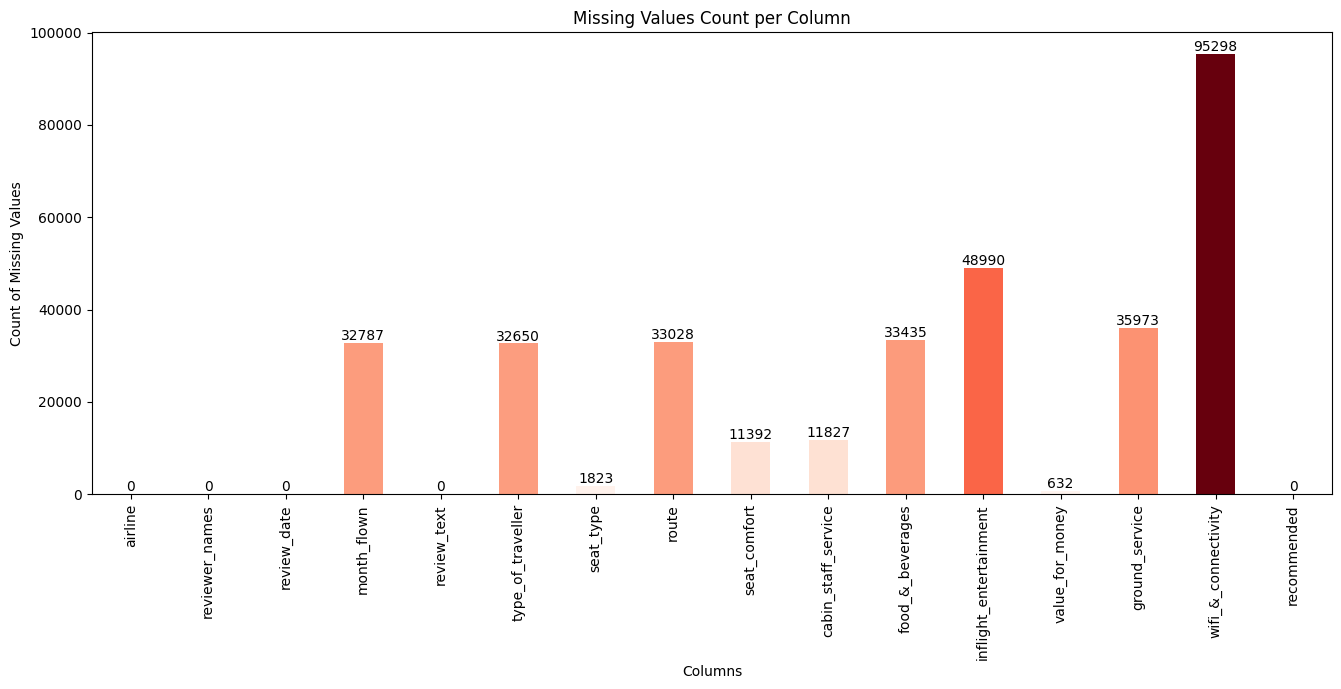

In [ ]:
# 8. Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb

# 9. Visualize missing values
na_counts = df.isna().sum()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(na_counts.min(), na_counts.max())
colors = plt.cm.Reds(norm(na_counts))

# Create the bar plot with the specified colors
ax = na_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(na_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count per Column')
plt.show()


In [ ]:
# 10. Check missing values
df.isna().sum()

# 11. Remove rows with missing values
df = df.dropna()

# 12. Verify missing values are gone
df.isna().sum()

# 13. Get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29114 entries, 1 to 127957
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   airline                 29114 non-null  object 
 1   reviewer_names          29114 non-null  object 
 2   review_date             29114 non-null  object 
 3   month_flown             29114 non-null  object 
 4   review_text             29114 non-null  object 
 5   type_of_traveller       29114 non-null  object 
 6   seat_type               29114 non-null  object 
 7   route                   29114 non-null  object 
 8   seat_comfort            29114 non-null  float64
 9   cabin_staff_service     29114 non-null  float64
 10  food_&_beverages        29114 non-null  float64
 11  inflight_entertainment  29114 non-null  float64
 12  value_for_money         29114 non-null  float64
 13  ground_service          29114 non-null  float64
 14  wifi_&_connectivity     29114 non-null  fl

In [ ]:
# 14. Import VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# 15. Define TextBlob sentiment function
from textblob import TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    # TextBlob returns polarity, where > 0 is positive, < 0 is negative, and 0 is neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
# 16. Define VADER sentiment function
def vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(text)
    compound = scores['compound']

    # VADER returns compound score, where > 0.05 is positive, < -0.05 is negative, and between is neutral
    if compound > 0.05:
        return 'positive'
    elif compound < -0.05:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
# 17. Apply TextBlob sentiment analysis
df['textblob_sentiment'] = df['review_text'].apply(textblob_sentiment)

In [ ]:
# 18. Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].apply(vader_sentiment)

In [ ]:
# 19. Get sentiment scores
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

def get_vader_score(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

df["sentiment_score"] = df["review_text"].apply(get_sentiment)
df["vader_score"] = df["review_text"].apply(get_vader_score)


In [ ]:
# 20. Rename column for consistency
df.rename(columns={'textblob_sentiment':'sentiment'}, inplace=True)

# 21. Sample data with sentiment
df.sample(10)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,vader_sentiment,sentiment_score,vader_score
6048,american-airlines,D Galten,2023-05-14,May 2023,✅ Trip Verified | I asked the flight attendan...,Solo Leisure,Economy Class,Ft Lauderdale to Los Angeles,4.0,3.0,2.0,3.0,2.0,3.0,3.0,No,positive,positive,0.166667,0.0917
25484,frontier-airlines,A Deane,2022-03-11,February 2022,✅ Trip Verified | Horrible company. I origin...,Family Leisure,Economy Class,Denver to Atlanta,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,negative,negative,-0.128125,-0.8225
113821,thai-airways,Mark Ellwood,2018-07-19,December 2017,✅ Trip Verified | London to Bangkok. Good fli...,Couple Leisure,Business Class,London to Bangkok,4.0,2.0,4.0,4.0,4.0,4.0,2.0,Yes,positive,positive,0.292812,0.8816
103615,singapore-airlines,L Han,2019-03-03,March 2019,✅ Trip Verified | Amsterdam to Singapore. Sin...,Family Leisure,Business Class,Amsterdam to Singapore,5.0,5.0,4.0,5.0,4.0,5.0,5.0,Yes,positive,positive,0.356852,0.9055
19885,delta-air-lines,S Ritchie,2016-04-16,April 2016,✅ Verified Review | Flew from St Lucia - O'ha...,Couple Leisure,Economy Class,UVF to ORD,1.0,1.0,1.0,1.0,1.0,1.0,1.0,No,negative,negative,-0.053750,-0.9583
36929,qatar-airways,Jeffrey Price,2015-10-09,October 2015,Qatar Airways from Melbourne to Barcelona via ...,Couple Leisure,Business Class,Madrid to Melbourne,5.0,5.0,5.0,4.0,4.0,4.0,3.0,Yes,positive,positive,0.271429,0.9225
105591,southwest-airlines,Oscar Veiga,2023-11-26,November 2023,✅ Trip Verified | My wife and my 3 children t...,Family Leisure,Economy Class,Atlanta to Havana via Ft Lauderdale,4.0,5.0,4.0,4.0,3.0,1.0,4.0,Yes,positive,positive,0.600000,0.0772
121498,virgin-australia,Chris Coulson,2018-01-05,January 2018,✅ Trip Verified | Sydney to Melbourne. Twice ...,Family Leisure,Economy Class,Sydney to Melbourne,3.0,3.0,2.0,1.0,1.0,1.0,1.0,No,negative,negative,-0.331250,-0.9600
2582,air-france,Aarjun Malhotra,2023-11-03,December 2022,Not Verified | I flew with Air France last De...,Family Leisure,Economy Class,Delhi to Los Angeles via Paris,4.0,5.0,5.0,5.0,5.0,5.0,1.0,Yes,positive,positive,0.690750,0.9871
5936,american-airlines,J Kayne,2023-07-09,July 2023,"Not Verified | Delayed 3 hours out of CVG, he...",Couple Leisure,Economy Class,Cincinnati to Portland via Philadelphia,2.0,2.0,3.0,2.0,2.0,1.0,1.0,No,negative,negative,-0.030000,-0.3036


In [ ]:
# 22. Create comparison of TextBlob and VADER
sentiment_comparison = pd.DataFrame({
    'TextBlob': df['sentiment'],
    'VADER': df['vader_sentiment']
})

# Count the combinations
comparison_counts = sentiment_comparison.groupby(['TextBlob', 'VADER']).size().reset_index(name='Count')
print("Comparison of TextBlob and VADER sentiment classifications:")
print(comparison_counts)


Comparison of TextBlob and VADER sentiment classifications:
   TextBlob     VADER  Count
0  negative  negative  11169
1  negative   neutral    185
2  negative  positive   1644
3   neutral  negative    172
4   neutral   neutral     12
5   neutral  positive     66
6  positive  negative   5584
7  positive   neutral    226
8  positive  positive  10056


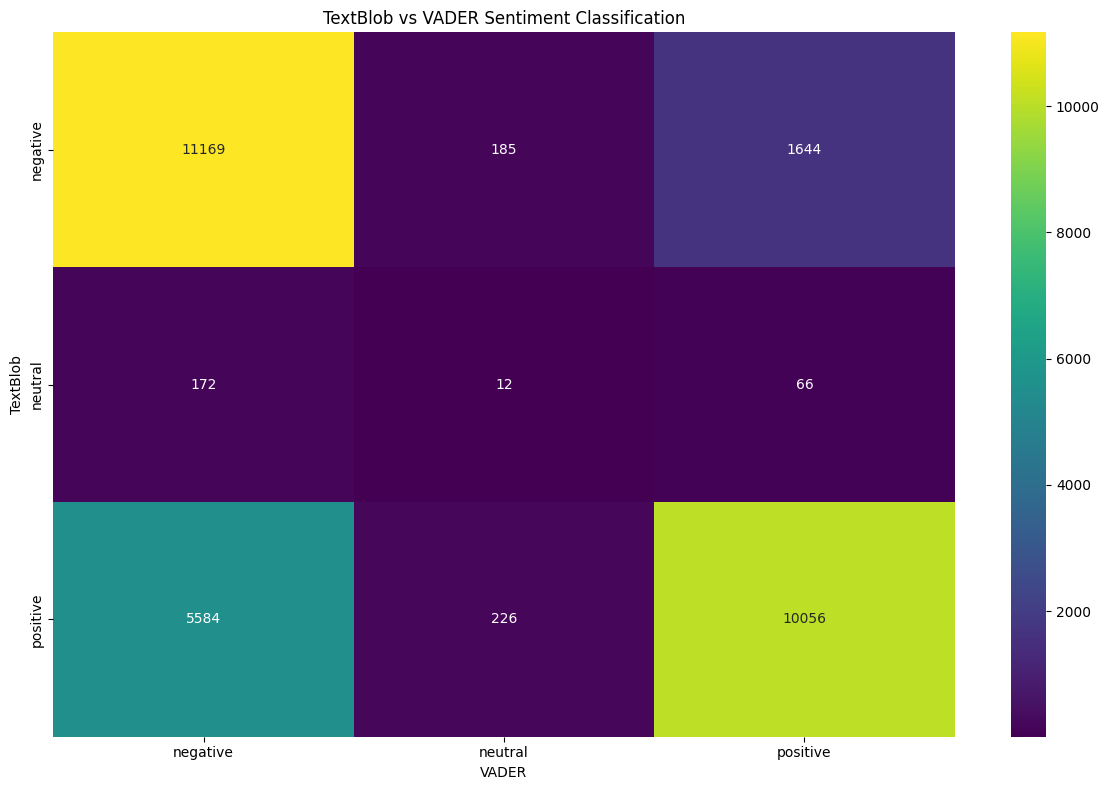

In [ ]:
# 23. Visualize the comparison
plt.figure(figsize=(12, 8))
pivot_table = comparison_counts.pivot(index='TextBlob', columns='VADER', values='Count')
sb.heatmap(pivot_table, annot=True, fmt='g', cmap='viridis')
plt.title('TextBlob vs VADER Sentiment Classification')
plt.tight_layout()
plt.show()


In [ ]:
# 24. Create sentiment agreement column
df['sentiment_agreement'] = df['sentiment'] == df['vader_sentiment']

In [ ]:
# 25. Filter for records where both agree
agreed_df = df[df['sentiment_agreement'] == True].copy()
print(f"Number of records where TextBlob and VADER agree: {len(agreed_df)}")
print(f"Percentage of records with agreement: {len(agreed_df)/len(df)*100:.2f}%")

Number of records where TextBlob and VADER agree: 21237
Percentage of records with agreement: 72.94%


In [ ]:
# 26. Check sentiment distribution in the agreed dataset
print("Sentiment distribution in the agreed dataset:")
print(agreed_df['sentiment'].value_counts())

Sentiment distribution in the agreed dataset:
sentiment
negative    11169
positive    10056
neutral        12
Name: count, dtype: int64


In [ ]:
# 27. Separate positive and negative reviews - using agreement dataset for better quality
positive_reviews = agreed_df[agreed_df['sentiment'] == 'positive']
negative_reviews = agreed_df[agreed_df['sentiment'] == 'negative']

In [ ]:
# 28. Check shape of positive reviews
print(f"Positive reviews with agreement: {len(positive_reviews)}")

# 29. Check shape of negative reviews
print(f"Negative reviews with agreement: {len(negative_reviews)}")

Positive reviews with agreement: 10056
Negative reviews with agreement: 11169


In [ ]:
# 30. Define sample sizes
positive_sample_size = min(10000, len(positive_reviews))
negative_sample_size = min(10000, len(negative_reviews))  # equal number in both dataset

In [ ]:
# 31. Create balanced samples
positive_sample = positive_reviews.sample(positive_sample_size, random_state=42)
negative_sample = negative_reviews.sample(negative_sample_size, random_state=42)


In [ ]:
# 32. Combine samples
stratified_data = pd.concat([positive_sample, negative_sample])

In [ ]:
# 33. Check sample of combined data
stratified_data.sample(10)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement
38188,spirit-airlines,James R Hudson,2022-12-21,October 2022,Not Verified | Spirit Airlines at the gate cha...,Business,Economy Class,Dallas to Orlando,1.0,1.0,...,1.0,1.0,1.0,1.0,No,positive,positive,0.016667,0.0618,True
95667,philippine-airlines,P Rayne,2017-07-18,April 2017,✅ Verified Review | Fukuoka to Manila. During...,Family Leisure,Economy Class,Fukuoka to Manila,5.0,5.0,...,4.0,4.0,5.0,4.0,Yes,positive,positive,0.290000,0.9371,True
95705,philippine-airlines,G Greenwood,2017-02-05,January 2017,✅ Verified Review | Manila to Hong Kong. Quit...,Family Leisure,Economy Class,Manila to Hong Kong,4.0,5.0,...,3.0,4.0,3.0,1.0,Yes,positive,positive,0.315479,0.9720,True
3384,air-france,P Hostetter,2016-03-30,March 2016,Dubai to Paris CDG on Boeing 777-30 ER delayed...,Family Leisure,Business Class,DXB to DTW via CDG,3.0,5.0,...,5.0,2.0,1.0,3.0,Yes,negative,negative,-0.039182,-0.9675,True
106388,southwest-airlines,C Martin,2019-09-21,September 2019,✅ Trip Verified | Flew Raleigh to Orlando retu...,Solo Leisure,Economy Class,Raleigh to Orlando,4.0,4.0,...,4.0,5.0,5.0,5.0,Yes,positive,positive,0.073810,0.1280,True
22388,etihad-airways,Robina Atta,2021-04-07,April 2021,✅ Trip Verified | It was my first time flying...,Solo Leisure,Economy Class,New York to Islamabad via Abu Dhabi,3.0,3.0,...,4.0,1.0,1.0,2.0,No,negative,negative,-0.099306,-0.7149,True
83532,jetblue-airways,J Birten,2020-02-16,February 2020,✅ Trip Verified | Orlando to Boston. They'll ...,Business,Premium Economy,Orlando to Boston,3.0,3.0,...,3.0,1.0,1.0,3.0,No,positive,positive,0.416667,0.5859,True
88692,lot-polish-airlines,Barbara Plazinska,2022-08-25,August 2022,✅ Trip Verified | Even though the Polish are ...,Family Leisure,Economy Class,Warsaw to New York JFK,5.0,1.0,...,3.0,2.0,5.0,3.0,No,positive,positive,0.065385,0.5918,True
19346,delta-air-lines,K Fedoronko,2018-07-06,July 2018,✅ Trip Verified | Jacksonville to Detroit. Ab...,Family Leisure,Economy Class,Jacksonville to Detroit,1.0,1.0,...,1.0,1.0,1.0,1.0,No,negative,negative,-0.466667,-0.7178,True
18269,delta-air-lines,B Lewis,2022-04-09,March 2022,✅ Trip Verified | New York to Sydney via Los A...,Family Leisure,Premium Economy,New York to Sydney via Los Angeles,4.0,1.0,...,4.0,4.0,5.0,2.0,No,positive,positive,0.161788,0.5775,True


In [ ]:
# 34. Reset index
stratified_data = stratified_data.reset_index(drop=True)
stratified_data.head()


,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement
0,singapore-airlines,J Morton,2023-11-18,November 2023,✅ Trip Verified | An excellent experience. Fo...,Couple Leisure,Business Class,Auckland to Singapore,4.0,5.0,...,4.0,4.0,4.0,4.0,Yes,positive,positive,0.391667,0.9559,True
1,akasa-air,Snigdha Mandal,2023-08-27,August 2023,Not Verified | I booked my Lucknow - Ahmedaba...,Solo Leisure,Economy Class,Lucknow to Ahmedabad,3.0,3.0,...,1.0,1.0,1.0,1.0,No,positive,positive,0.075524,0.7769,True
2,british-airways,Alan Thompson,2017-10-23,October 2017,✅ Verified Review | Bari to Gatwick. More of ...,Couple Leisure,Economy Class,Bari to Gatwick,3.0,3.0,...,1.0,4.0,4.0,1.0,Yes,positive,positive,0.075198,0.8217,True
3,southwest-airlines,G Carrell,2021-04-19,April 2021,✅ Trip Verified | I am a flyer on Southwest. ...,Family Leisure,Economy Class,Ontario to Portland via Sacramento,1.0,1.0,...,1.0,1.0,1.0,1.0,No,positive,positive,0.373948,0.9700,True
4,air-canada,Jay Halls,2019-07-14,July 2019,❎ Not Verified | Toronto Pearson to London Hea...,Solo Leisure,Premium Economy,Toronto Pearson to London Heathrow,5.0,5.0,...,5.0,5.0,5.0,5.0,Yes,positive,positive,0.700000,0.9657,True


In [ ]:
# 35. Check sentiment distribution
stratified_data['sentiment'].value_counts()

,count
sentiment,
positive,10000
negative,10000


In [ ]:
# 36. Create copy for further processing
df = stratified_data.copy()

In [ ]:
# 37. Add text metrics
df['num_characters'] = df['review_text'].apply(len)


In [ ]:
# 38. Download NLTK data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 38. Download NLTK data
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 39. Add word count metric
df['num_words'] = df['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
# 40. Add sentence count metric
df['num_sentences'] = df['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
# 41. Check sample with metrics
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,wifi_&_connectivity,recommended,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences
7851,delta-air-lines,Michael Roberts,2021-09-27,September 2021,✅ Trip Verified | Absolutely amazing flight. ...,Business,First Class,Cancun to Salt lake city,5.0,5.0,...,5.0,Yes,positive,positive,0.666667,0.9650,True,227,41,4
15235,virgin-australia,S Prabhakar,2024-05-26,May 2024,Not Verified | Staff customer service poor. I ...,Couple Leisure,Economy Class,Sydney to Nadi,1.0,1.0,...,1.0,No,negative,negative,-0.007143,-0.5267,True,569,122,9
14929,american-airlines,Maria Arceo,2021-06-17,June 2021,Not Verified | This was a terrible experience...,Solo Leisure,Economy Class,Houston to Arcata,1.0,1.0,...,1.0,No,negative,negative,-0.084055,-0.8158,True,1170,254,17
18832,tap-portugal,J Cole,2023-03-15,March 2023,Not Verified | \r\nWe spent a small fortune t...,Couple Leisure,Business Class,Lisbon to Gatwick,1.0,4.0,...,4.0,No,negative,negative,-0.216667,-0.6249,True,215,43,3
6052,swiss-international-air-lines,H Keller,2022-01-12,December 2021,"✅ Trip Verified | First of all, the purpose of...",Business,Business Class,Geneva to Bangkok via Zürich,1.0,1.0,...,1.0,No,positive,positive,0.066578,0.4391,True,2013,409,17


In [ ]:
# 42. Get statistics for text metrics
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20000.00000,20000.000000,20000.000000
mean,789.53705,160.934950,9.084850
std,571.76723,117.707586,5.725058
min,83.00000,16.000000,1.000000
25%,401.00000,81.000000,5.000000
50%,624.00000,126.000000,8.000000
75%,982.00000,200.000000,11.000000
max,4634.00000,957.000000,51.000000


In [ ]:
# 43. Install emoji library
!pip install emoji
import emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.0 MB/s eta 0:00:00


In [ ]:
# 44. Define function to handle emojis
def demojize_text(text):
    return emoji.demojize(text)

In [ ]:
# 45. Apply emoji handling
df.loc[:, 'clean_text'] = df['review_text'].apply(demojize_text)

In [ ]:
# 46. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,recommended,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text
11567,united-airlines,William Carter,2018-10-28,October 2018,Not Verified | Dublin to Tampa via Newark. Ho...,Couple Leisure,Premium Economy,Dublin to Tampa via Newark,1.0,1.0,...,No,negative,negative,-0.220000,-0.9441,True,382,79,6,Not Verified | Dublin to Tampa via Newark. Ho...
14562,airasia-india,N Tharkude,2022-05-28,May 2022,✅ Trip Verified | I strongly recommend not to...,Family Leisure,Economy Class,Pune to Srinagar via Delhi,1.0,1.0,...,No,negative,negative,-0.060000,-0.5341,True,636,138,3,:check_mark_button: Trip Verified | I strongl...
2894,singapore-airlines,K Pataporn,2019-07-04,July 2019,✅ Trip Verified | Bangkok to Singapore . I wa...,Family Leisure,Economy Class,Bangkok to Singapore,2.0,5.0,...,Yes,positive,positive,0.101677,0.9964,True,3397,676,41,:check_mark_button: Trip Verified | Bangkok t...
16372,american-airlines,W Anderson,2019-08-24,August 2019,✅ Trip Verified | San Francisco to Los Angeles...,Couple Leisure,Economy Class,San Francisco to Los Angeles,1.0,1.0,...,No,negative,negative,-0.120455,-0.7719,True,462,92,7,:check_mark_button: Trip Verified | San Franci...
13805,blue-air,D Malina,2021-08-14,August 2021,✅ Trip Verified | The worst experience with a...,Couple Leisure,Economy Class,Cluj-Napoca to Bucharest,1.0,1.0,...,No,negative,negative,-0.100000,-0.7642,True,489,97,6,:check_mark_button: Trip Verified | The worst...


In [ ]:
# 47. Add trip verification flag
df['trip_verified'] = np.where(df['review_text'].str.contains('Trip Verified', case=False, na=False), 'yes', 'no')

In [ ]:
# 48. Check sample with verification
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
10497,avianca,Kristina Folz,2024-04-30,April 2024,Not Verified | This is the worst airline I h...,Solo Leisure,Economy Class,Los Angeles to Bogota,1.0,1.0,...,negative,negative,-0.466667,-0.9511,True,523,107,7,Not Verified | This is the worst airline I h...,no
15414,virgin-australia,Y Kusata,2020-01-18,January 2020,✅ Trip Verified | Brisbane to Sydney. I was s...,Solo Leisure,Economy Class,Brisbane to Sydney,2.0,1.0,...,negative,negative,-0.129167,-0.5354,True,379,80,5,:check_mark_button: Trip Verified | Brisbane ...,yes
11894,south-african-airways,B Vincent,2020-03-20,March 2020,✅ Trip Verified | I asked for champagne on boa...,Family Leisure,Business Class,Washington to Accra,2.0,3.0,...,negative,negative,-0.416667,-0.8569,True,1715,361,20,:check_mark_button: Trip Verified | I asked fo...,yes
7889,american-airlines,Roy Whitehead,2018-09-07,June 2018,Not Verified | The worst experience ever! I b...,Couple Leisure,Premium Economy,Phoenix to Washington,1.0,2.0,...,positive,positive,0.044506,0.1179,True,2510,498,25,Not Verified | The worst experience ever! I b...,no
1274,airasia,A Sudeep,2023-01-06,December 2022,"Not Verified | First Of all, their website and...",Solo Leisure,Economy Class,Melbourne to Hyderabad via Kuala Lumpur,2.0,3.0,...,positive,positive,0.010985,0.7618,True,594,111,8,"Not Verified | First Of all, their website and...",no


In [ ]:
# 49. Convert text to lowercase
df['clean_text'] = df['clean_text'].str.lower()


In [ ]:
# 50. Check sample
df.sample(2)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
5684,alaska-airlines,Stephen G Sweet,2019-12-08,December 2019,Not Verified | Recently flew from Anchorage t...,Solo Leisure,Premium Economy,Anchorage to Tampa via Seattle,4.0,5.0,...,positive,positive,0.178902,0.8987,True,1298,261,13,not verified | recently flew from anchorage t...,no
1528,china-southern-airlines,Y Xu,2018-08-29,August 2018,✅ Trip Verified | Shanghai to Wuhan. When I b...,Solo Leisure,Economy Class,Shanghai to Wuhan,4.0,4.0,...,positive,positive,0.186111,0.5885,True,456,83,5,:check_mark_button: trip verified | shanghai ...,yes


In [ ]:
# 51. Define chat words dictionary
chat_words={
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BF": "Boy Friend",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "lol": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "4MY": "For My",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "R": "Are",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when. TFW internet slang often goes in a caption to an image.",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}


In [ ]:
# 52. Define function to convert chat words
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
# 53. Apply chat word conversion
df['clean_text'] = df['clean_text'].apply(chat_conversion)

In [ ]:
# 54. Import string
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# 55. Define punctuation
exclude = string.punctuation

In [ ]:
# 56. Define function to remove punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
# 57. Apply punctuation removal
df['clean_text'] = df['clean_text'].apply(remove_punc)

In [ ]:
# 58. Check data
df.head(2)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
0,singapore-airlines,J Morton,2023-11-18,November 2023,✅ Trip Verified | An excellent experience. Fo...,Couple Leisure,Business Class,Auckland to Singapore,4.0,5.0,...,positive,positive,0.391667,0.9559,True,254,51,5,checkmarkbutton trip verified an excellent ex...,yes
1,akasa-air,Snigdha Mandal,2023-08-27,August 2023,Not Verified | I booked my Lucknow - Ahmedaba...,Solo Leisure,Economy Class,Lucknow to Ahmedabad,3.0,3.0,...,positive,positive,0.075524,0.7769,True,2944,596,32,not verified i booked my lucknow ahmedabad f...,no


In [ ]:
# 59. Import spacy
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# 60. Tokenize text
df['clean_text'] = df['clean_text'].apply(lambda text: [token.text for token in nlp(text)])

In [ ]:
# 61. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
14590,latam-airlines,Warren Stanborough,2016-12-13,December 2016,On a 3hour 30 minute LATAM flight from Ushuaia...,Couple Leisure,Economy Class,USH to AEP,3.0,4.0,...,negative,negative,-0.167857,-0.6549,True,366,75,5,"[on, a, 3hour, 30, minute, latam, flight, from...",no
5895,united-airlines,J Deighton,2015-12-06,November 2015,Slightly old looking plane were my first impre...,Solo Leisure,Economy Class,Newark to Manchester,5.0,5.0,...,positive,positive,0.250000,0.9170,True,656,134,10,"[slightly, old, looking, plane, were, my, firs...",no
401,klm-royal-dutch-airlines,Marine Keller Müller,2022-03-27,March 2022,✅ Trip Verified | Despite a delay of nearly 5...,Family Leisure,Economy Class,Geneva to New York via Amsterdam,4.0,5.0,...,positive,positive,0.162716,0.6183,True,1060,228,10,"[checkmarkbutton, trip, verified, , despite, ...",yes
7456,lufthansa,D Anderson,2017-04-03,March 2017,✅ Verified Review | Flew brand new Lufthansa ...,Solo Leisure,Economy Class,Delhi to Los Angeles via Munich,3.0,4.0,...,positive,positive,0.316780,0.9355,True,698,134,9,"[checkmarkbutton, verified, review, , flew, b...",no
2804,swiss-international-air-lines,Georgios Vrontos,2017-04-27,April 2017,✅ Verified Review | Flew Swiss Intl Air Lines...,Couple Leisure,Economy Class,Athens to Montreal via Zurich,4.0,5.0,...,positive,positive,0.192424,0.7906,True,693,140,10,"[checkmarkbutton, verified, review, , flew, s...",no


In [ ]:
# 62. Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
# 63. Add custom stopwords
custom_words = ['checkmarkbutton', 'verified']
stop_words = set(stopwords.words('english'))
stop_words.update(custom_words)

In [ ]:
# 64. Define function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [ ]:
# 65. Apply stopword removal
df['clean_text'] = df['clean_text'].apply(remove_stopwords)

In [ ]:
# 66. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
18644,frontier-airlines,Kelly Hogg Turner,2023-08-07,August 2023,Not Verified | The service was horrible. Firs...,Solo Leisure,Economy Class,Cleveland to Tampa via Hudson,1.0,1.0,...,negative,negative,-0.041178,-0.9537,True,2187,453,28,"[ , service, horrible, first, flight, supposed...",no
8515,air-india,Ravi Srinivas,2023-04-14,April 2023,"Not Verified | Check in was smooth, website w...",Couple Leisure,Economy Class,Hyderabad to Tokyo,2.0,3.0,...,positive,positive,0.045165,0.1779,True,1140,216,15,"[ , check, smooth, website, works, staff, coun...",no
169,flair-airlines,Andrea Popowycz,2018-06-29,June 2018,✅ Trip Verified | Edmonton to Kelowna. 24hrs ...,Family Leisure,Business Class,Edmonton to Kelowna,1.0,1.0,...,positive,positive,0.107619,0.6808,True,985,196,7,"[trip, , edmonton, kelowna, 24hrs, flight, we...",yes
14986,eurowings,Terri Innes,2018-07-04,June 2018,Not Verified | The flights were late we were d...,Couple Leisure,Economy Class,Stansted to Dominican Republic via Germany,1.0,2.0,...,negative,negative,-0.240000,-0.8442,True,794,167,9,"[ , flights, late, dumped, wrong, airport, hun...",no
4396,virgin-australia,Jon Roscoe,2015-09-24,September 2015,I flew from Bali to Brisbane with Virgin Austr...,Solo Leisure,Economy Class,Bali to Brisbane,1.0,2.0,...,positive,positive,0.022024,0.7778,True,523,104,6,"[flew, bali, brisbane, virgin, australia, econ...",no


In [ ]:
# 67. Import stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
# 68. Apply stemming
df['clean_text'] = df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# 69. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
1347,qatar-airways,Michael Hoskins,2021-02-27,February 2021,✅ Trip Verified | The only experience I had b...,Solo Leisure,Economy Class,Seattle to Bangkok via Doha,5.0,5.0,...,positive,positive,0.300502,0.7438,True,1412,293,19,"[trip, , experi, qatar, ticket, purchas, thou...",yes
12012,air-india,N Chandar,2024-11-09,November 2024,✅ Trip Verified | Air India changed my sched...,Family Leisure,Economy Class,Mumbai to London Heathrow,2.0,2.0,...,negative,negative,-0.106250,-0.9295,True,703,137,7,"[trip, , air, india, chang, schedul, flight, ...",yes
12134,royal-jordanian-airlines,Y Yousif,2022-07-06,July 2022,Not Verified | The absolute worst customer se...,Solo Leisure,Economy Class,Detroit to Amman,3.0,5.0,...,negative,negative,-0.304821,-0.9780,True,603,125,7,"[ , absolut, worst, custom, servic, histori, l...",no
3310,frontier-airlines,M Sheane,2023-03-23,March 2023,"✅ Trip Verified | This airline is garbage, wo...",Solo Leisure,Economy Class,Phoenix to Minneapolis,1.0,1.0,...,positive,positive,0.066667,0.1027,True,158,30,2,"[trip, , airlin, garbag, wors, spirit, flight...",yes
12580,jetblue-airways,T Warner,2017-06-15,June 2017,✅ Verified Review | JetBlue is the worst airli...,Couple Leisure,Economy Class,Fort Lauderdale to Las Vegas,1.0,1.0,...,negative,negative,-0.113095,-0.8519,True,508,105,4,"[review, , jetblu, worst, airlin, first, tear...",no


In [ ]:
# 70. Define function to remove special characters
import re

def remove_special_characters(text):
    # Define a regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [ ]:
# 71. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
6393,westjet,C Simpson,2018-01-24,January 2018,✅ Trip Verified | Flew from Hamilton to Las Ve...,Solo Leisure,Premium Economy,Hamilton to Las Vegas,4.0,5.0,...,positive,positive,0.154004,0.6769,True,349,65,4,"[trip, , flew, hamilton, la, vega, flight, po...",yes
1834,lot-polish-airlines,Judah Harris,2022-09-06,September 2022,✅ Trip Verified | I was required to go to the...,Family Leisure,Economy Class,Tel Aviv to New York JFK via Warsaw,3.0,4.0,...,positive,positive,0.122242,0.9918,True,3499,734,25,"[trip, , requir, go, checkin, counter, get, p...",yes
1992,south-african-airways,N Galpin,2019-02-21,February 2019,✅ Trip Verified | London to Cape Town via Joh...,Couple Leisure,Economy Class,London to Cape Town via Johannesburg,3.0,4.0,...,positive,positive,0.180389,0.8716,True,717,142,9,"[trip, , london, cape, town, via, johannesbur...",yes
11154,air-france,Andrija Vrbic,2019-12-04,November 2019,✅ Trip Verified | I flew with Air France from...,Family Leisure,Economy Class,Paris to Buenos Aires,1.0,1.0,...,negative,negative,-0.152500,-0.9291,True,368,78,5,"[trip, , flew, air, franc, pari, bueno, air, ...",yes
1162,united-airlines,T. Childan,2019-08-13,July 2019,Not Verified | United shines when flying out ...,Family Leisure,Business Class,San Francisco to Frankfurt,5.0,5.0,...,positive,positive,0.253116,0.9530,True,725,142,10,"[ , unit, shine, fli, hub, tofrom, intern, fle...",no


In [ ]:
# 72. Join tokens back to text
df['clean_text'] = df['clean_text'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
# 73. Check sample
df.sample(5)


,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment,vader_sentiment,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified
8251,malaysia-airlines,Karen Kuang,2023-04-02,April 2023,✅ Trip Verified | The crew service is not up t...,Business,Economy Class,Kuala Lumpur to Kuching,3.0,1.0,...,positive,positive,0.131250,0.7394,True,421,81,3,trip crew servic standard anymor realli disa...,yes
8033,united-airlines,D Graubard,2015-12-17,December 2015,ORD-YEG morning nonstop E-175. United Express....,Business,Premium Economy,ORD to YEG,4.0,4.0,...,positive,positive,0.550000,0.9483,True,391,74,10,ordyeg morn nonstop e175 unit express excel fl...,no
58,iberia,Lars Sipila,2016-06-05,May 2016,✅ Verified Review | Having landed in Madrid a...,Solo Leisure,Business Class,MAD to EZE,5.0,4.0,...,positive,positive,0.319848,0.9934,True,2038,408,12,review land madrid four hour flight helsinki...,no
11837,mea-middle-east-airlines,L Samina,2016-07-27,July 2016,✅ Verified Review | London Heathrow to Beirut...,Solo Leisure,Business Class,LHR to BEY,5.0,5.0,...,negative,negative,-0.066667,-0.3612,True,704,143,7,review london heathrow beirut return luggag ...,no
7610,srilankan-airlines,Andrew Riches,2022-06-26,June 2022,✅ Trip Verified | Flew London to Sydney via Co...,Solo Leisure,Business Class,London to Sydney via Colombo,4.0,3.0,...,positive,positive,0.292732,0.9865,True,828,172,7,trip flew london sydney via colombo long wai...,yes


In [ ]:
# 74. Import WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

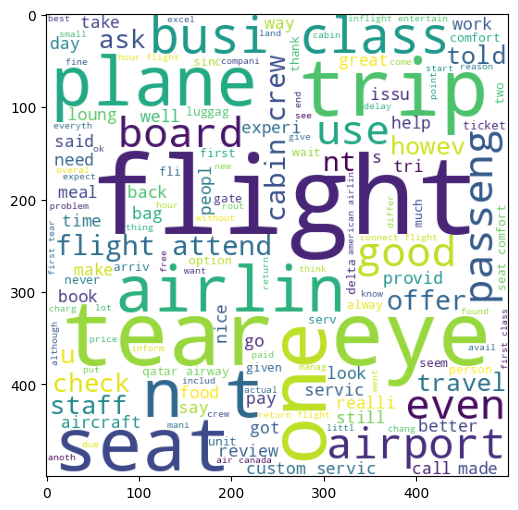

In [ ]:
# 75. Generate positive wordcloud
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['clean_text'].str.cat(sep=" "))

# 76. Display positive wordcloud
plt.figure(figsize=(16, 6))
plt.imshow(positive_wc)

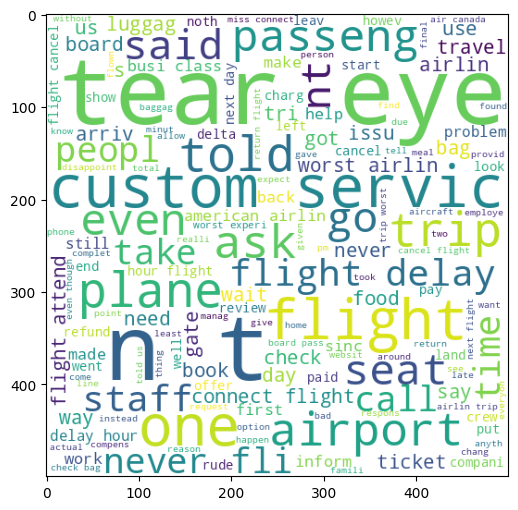

In [ ]:
# 77. Generate negative wordcloud
negative_wc = wc.generate(df[df['sentiment'] == 'negative']['clean_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(negative_wc)

In [ ]:
# 78. Create positive word corpus
positive_corpus = []
for text in df[df['sentiment'] == 'positive']['clean_text'].tolist():
    for t in text.split():
        positive_corpus.append(t)

In [ ]:
# 79. Check length
len(positive_corpus)


772433

In [ ]:
# 80. Import warnings and collections
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

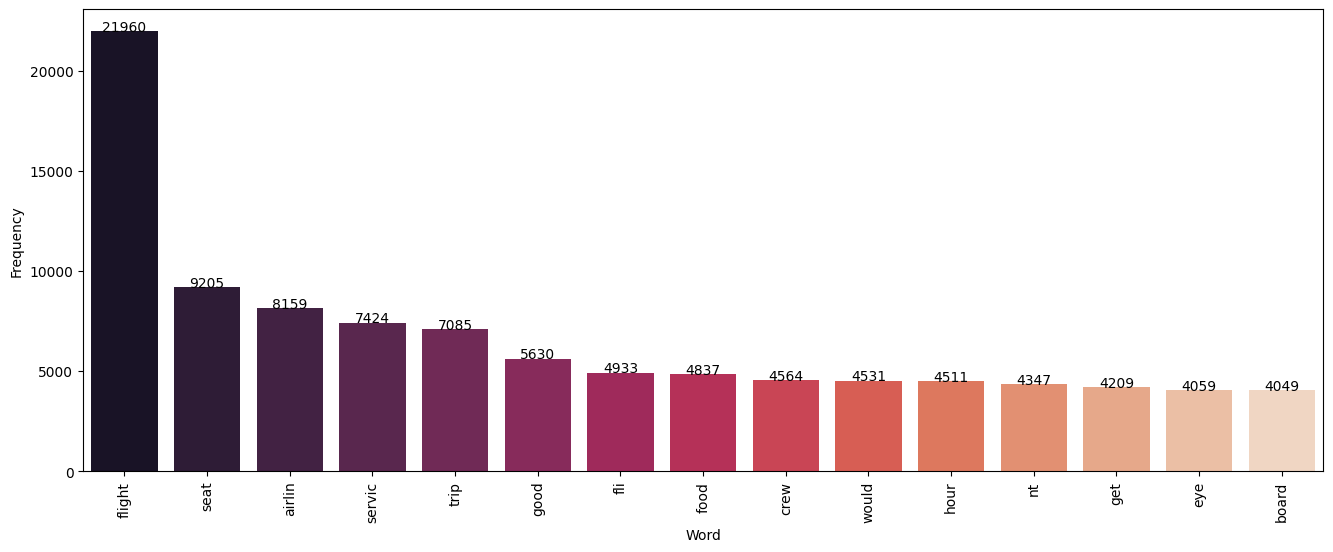

In [ ]:
# 81. Analyze most common positive words
most_common_words = Counter(positive_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()


In [ ]:
# 82. Create negative word corpus
negative_corpus = []
for text in df[df['sentiment'] == 'negative']['clean_text'].tolist():
    for t in text.split():
        negative_corpus.append(t)

# 83. Check length
len(negative_corpus)

720383

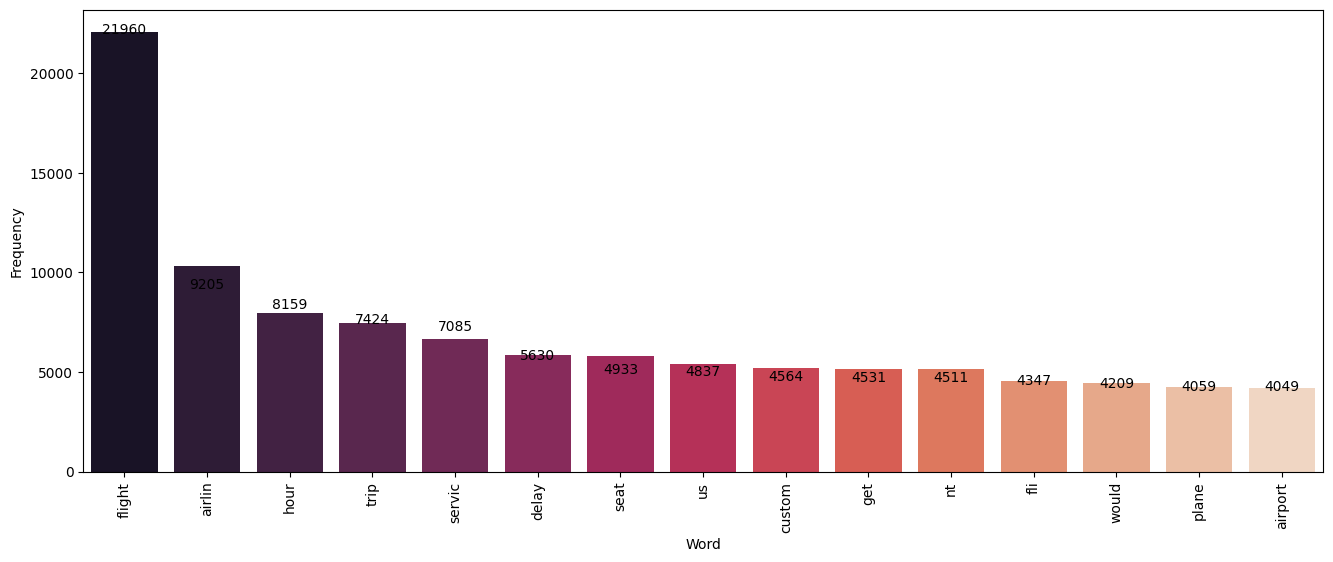

In [ ]:
# 84. Analyze most common negative words
most_common_word = Counter(negative_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df1 = pd.DataFrame(most_common_word, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df1))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df1, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()


In [ ]:
# 85. Check columns
df.columns


Index(['airline', 'reviewer_names', 'review_date', 'month_flown',
       'review_text', 'type_of_traveller', 'seat_type', 'route',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'value_for_money', 'ground_service',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'vader_sentiment',
       'sentiment_score', 'vader_score', 'sentiment_agreement',
       'num_characters', 'num_words', 'num_sentences', 'clean_text',
       'trip_verified'],
      dtype='object')

In [ ]:
# 86. Encode trip verified column
df['trip_verified'] = df['trip_verified'].map({'yes': 1, 'no': 0})


In [ ]:
# 87. Encode recommended column
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})


In [ ]:
# 88. Encode sentiment columns
df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df['vader_sentiment_encoded'] = df['vader_sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

In [ ]:
# 89. Check sample
df.sample(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,seat_type,route,seat_comfort,cabin_staff_service,...,sentiment_score,vader_score,sentiment_agreement,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,vader_sentiment_encoded
5140,sun-country-airlines,Mark Cegielski,2018-10-11,October 2018,✅ Trip Verified | Los Angeles to Minneapolis....,Couple Leisure,First Class,Los Angeles to Minneapolis,1.0,1.0,...,0.199597,0.9267,True,1394,291,18,trip lo angel minneapoli wife fli year visit...,1,1,1
6593,united-airlines,Sheila Wasserman,2016-07-05,July 2016,"✅ Verified Review | Flew United Airlines, fir...",Couple Leisure,First Class,LAX to ORD via LAX,4.0,2.0,...,0.101096,0.8935,True,1617,337,15,review flew unit airlin first class lo angel...,0,1,1
2297,lufthansa,M Benson,2016-08-15,July 2016,✅ Verified Review | It was the first flight of...,Solo Leisure,Economy Class,OPO to FRA,5.0,5.0,...,0.317632,0.9938,True,1207,227,9,review first flight day porto frankfurt luft...,0,1,1
3059,american-airlines,Iheb Namsi,2018-07-01,June 2018,✅ Trip Verified | On my way back home from Li...,Family Leisure,Economy Class,Lima to Norfolk via Miami,1.0,1.0,...,0.062164,0.3299,True,1321,282,13,trip way back home lima servic bad lima miam...,1,1,1
3883,american-airlines,C Jordan,2016-09-27,September 2016,Buenos Aires to London Heathrow via New York J...,Solo Leisure,Business Class,EZE to LHR via JFK,5.0,3.0,...,0.349669,0.9086,True,523,98,7,bueno air london heathrow via new york jfk ame...,0,1,1


In [ ]:
# 90. Check columns
df.columns

Index(['airline', 'reviewer_names', 'review_date', 'month_flown',
       'review_text', 'type_of_traveller', 'seat_type', 'route',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'value_for_money', 'ground_service',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'vader_sentiment',
       'sentiment_score', 'vader_score', 'sentiment_agreement',
       'num_characters', 'num_words', 'num_sentences', 'clean_text',
       'trip_verified', 'sentiment_encoded', 'vader_sentiment_encoded'],
      dtype='object')

In [ ]:
# 91. Define numeric columns
numerics_columns = ['seat_type', 'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
                    'inflight_entertainment', 'ground_service', 'value_for_money',
                    'wifi_&_connectivity', 'trip_verified', 'recommended', 'sentiment_encoded']


In [ ]:
# 92. Create numeric dataframe
cdf = df[numerics_columns].reset_index(drop=True)


In [ ]:
# 93. Check seat types
df['seat_type'].value_counts()

,count
seat_type,
Economy Class,15714
Business Class,2712
Premium Economy,1032
First Class,542


In [ ]:
# 94. Create dummies for seat type
df = pd.get_dummies(df, columns=['seat_type'])

In [ ]:
# 95. Check head
df.head(5)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,route,seat_comfort,cabin_staff_service,food_&_beverages,...,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,vader_sentiment_encoded,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy
0,singapore-airlines,J Morton,2023-11-18,November 2023,✅ Trip Verified | An excellent experience. Fo...,Couple Leisure,Auckland to Singapore,4.0,5.0,4.0,...,51,5,trip excel experi food simpli terrif pan sea...,1,1,1,True,False,False,False
1,akasa-air,Snigdha Mandal,2023-08-27,August 2023,Not Verified | I booked my Lucknow - Ahmedaba...,Solo Leisure,Lucknow to Ahmedabad,3.0,3.0,2.0,...,596,32,book lucknow ahmedabad flight akasa qp 1...,0,1,1,False,True,False,False
2,british-airways,Alan Thompson,2017-10-23,October 2017,✅ Verified Review | Bari to Gatwick. More of ...,Couple Leisure,Bari to Gatwick,3.0,3.0,1.0,...,210,17,review bari gatwick held togeth cockpit crew...,0,1,1,False,True,False,False
3,southwest-airlines,G Carrell,2021-04-19,April 2021,✅ Trip Verified | I am a flyer on Southwest. ...,Family Leisure,Ontario to Portland via Sacramento,1.0,1.0,1.0,...,293,20,trip flyer southwest perhap much peopl numbe...,1,1,1,False,True,False,False
4,air-canada,Jay Halls,2019-07-14,July 2019,❎ Not Verified | Toronto Pearson to London Hea...,Solo Leisure,Toronto Pearson to London Heathrow,5.0,5.0,5.0,...,93,11,crossmarkbutton toronto pearson london heath...,0,1,1,False,False,False,True


In [ ]:
# 96. Rename seat type columns
df.rename(columns={'seat_type_Business Class': 'business_class',
                    'seat_type_Economy Class': 'economy_class',
                    'seat_type_First Class': 'first_class',
                    'seat_type_Premium Economy': 'premium_economy'}, inplace=True)

In [ ]:
# 97. Check head
df.head(2)

,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,route,seat_comfort,cabin_staff_service,food_&_beverages,...,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy
0,singapore-airlines,J Morton,2023-11-18,November 2023,✅ Trip Verified | An excellent experience. Fo...,Couple Leisure,Auckland to Singapore,4.0,5.0,4.0,...,51,5,trip excel experi food simpli terrif pan sea...,1,1,1,True,False,False,False
1,akasa-air,Snigdha Mandal,2023-08-27,August 2023,Not Verified | I booked my Lucknow - Ahmedaba...,Solo Leisure,Lucknow to Ahmedabad,3.0,3.0,2.0,...,596,32,book lucknow ahmedabad flight akasa qp 1...,0,1,1,False,True,False,False


In [ ]:
# 98. Convert to integer
df[['business_class', 'economy_class', 'first_class', 'premium_economy']] = df[['business_class', 'economy_class', 'first_class', 'premium_economy']].astype(int)

In [ ]:
# 99. Check head
df.head(5)


,airline,reviewer_names,review_date,month_flown,review_text,type_of_traveller,route,seat_comfort,cabin_staff_service,food_&_beverages,...,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy
0,singapore-airlines,J Morton,2023-11-18,November 2023,✅ Trip Verified | An excellent experience. Fo...,Couple Leisure,Auckland to Singapore,4.0,5.0,4.0,...,51,5,trip excel experi food simpli terrif pan sea...,1,1,1,1,0,0,0
1,akasa-air,Snigdha Mandal,2023-08-27,August 2023,Not Verified | I booked my Lucknow - Ahmedaba...,Solo Leisure,Lucknow to Ahmedabad,3.0,3.0,2.0,...,596,32,book lucknow ahmedabad flight akasa qp 1...,0,1,1,0,1,0,0
2,british-airways,Alan Thompson,2017-10-23,October 2017,✅ Verified Review | Bari to Gatwick. More of ...,Couple Leisure,Bari to Gatwick,3.0,3.0,1.0,...,210,17,review bari gatwick held togeth cockpit crew...,0,1,1,0,1,0,0
3,southwest-airlines,G Carrell,2021-04-19,April 2021,✅ Trip Verified | I am a flyer on Southwest. ...,Family Leisure,Ontario to Portland via Sacramento,1.0,1.0,1.0,...,293,20,trip flyer southwest perhap much peopl numbe...,1,1,1,0,1,0,0
4,air-canada,Jay Halls,2019-07-14,July 2019,❎ Not Verified | Toronto Pearson to London Hea...,Solo Leisure,Toronto Pearson to London Heathrow,5.0,5.0,5.0,...,93,11,crossmarkbutton toronto pearson london heath...,0,1,1,0,0,0,1


In [ ]:
# 100. Check columns
df.columns

Index(['airline', 'reviewer_names', 'review_date', 'month_flown',
       'review_text', 'type_of_traveller', 'route', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'value_for_money', 'ground_service', 'wifi_&_connectivity',
       'recommended', 'sentiment', 'vader_sentiment', 'sentiment_score',
       'vader_score', 'sentiment_agreement', 'num_characters', 'num_words',
       'num_sentences', 'clean_text', 'trip_verified', 'sentiment_encoded',
       'vader_sentiment_encoded', 'business_class', 'economy_class',
       'first_class', 'premium_economy'],
      dtype='object')

In [ ]:
# 101. Create subset dataframe
sub_df = df.copy()
sub_df = sub_df.drop(columns=['reviewer_names', 'review_date', 'review_text', 'route', 'month_flown',
                             'num_characters', 'num_words', 'num_sentences'])

In [ ]:
# 102. Check head
sub_df.head(5)

,airline,type_of_traveller,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,...,vader_score,sentiment_agreement,clean_text,trip_verified,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy
0,singapore-airlines,Couple Leisure,4.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,...,0.9559,True,trip excel experi food simpli terrif pan sea...,1,1,1,1,0,0,0
1,akasa-air,Solo Leisure,3.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN,...,0.7769,True,book lucknow ahmedabad flight akasa qp 1...,0,1,1,0,1,0,0
2,british-airways,Couple Leisure,3.0,3.0,1.0,1.0,4.0,4.0,1.0,NaN,...,0.8217,True,review bari gatwick held togeth cockpit crew...,0,1,1,0,1,0,0
3,southwest-airlines,Family Leisure,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0.9700,True,trip flyer southwest perhap much peopl numbe...,1,1,1,0,1,0,0
4,air-canada,Solo Leisure,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,...,0.9657,True,crossmarkbutton toronto pearson london heath...,0,1,1,0,0,0,1


In [ ]:
# 103. Create dummies for traveler type
sub_df = pd.get_dummies(sub_df, columns=['type_of_traveller'])

In [ ]:
# 104. Check head
sub_df.head(5)

,airline,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,...,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy,type_of_traveller_Business,type_of_traveller_Couple Leisure,type_of_traveller_Family Leisure,type_of_traveller_Solo Leisure
0,singapore-airlines,4.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,positive,...,1,1,1,0,0,0,False,True,False,False
1,akasa-air,3.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN,positive,...,1,1,0,1,0,0,False,False,False,True
2,british-airways,3.0,3.0,1.0,1.0,4.0,4.0,1.0,NaN,positive,...,1,1,0,1,0,0,False,True,False,False
3,southwest-airlines,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,positive,...,1,1,0,1,0,0,False,False,True,False
4,air-canada,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,positive,...,1,1,0,0,0,1,False,False,False,True


In [ ]:
# 105. Rename traveler type columns
sub_df.rename(columns={'type_of_traveller_Couple Leisure': 'couple_traveller',
                        'type_of_traveller_Family Leisure': 'family',
                        'type_of_traveller_Solo Leisure': 'solo_traveller',
                        'type_of_traveller_Business': 'business_traveller'}, inplace=True)


In [ ]:
# 106. Convert to integer
sub_df[['couple_traveller', 'family', 'solo_traveller', 'business_traveller']] = sub_df[['couple_traveller', 'family', 'solo_traveller', 'business_traveller']].astype(int)

# 107. Check head
sub_df.head(2)

,airline,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,...,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy,business_traveller,couple_traveller,family,solo_traveller
0,singapore-airlines,4.0,5.0,4.0,4.0,4.0,4.0,4.0,NaN,positive,...,1,1,1,0,0,0,0,1,0,0
1,akasa-air,3.0,3.0,2.0,1.0,1.0,1.0,1.0,NaN,positive,...,1,1,0,1,0,0,0,0,0,1


In [ ]:
# 108. Fill NaN and convert to integer
sub_df[['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
        'inflight_entertainment', 'ground_service', 'value_for_money',
        'wifi_&_connectivity', 'recommended']] = sub_df[['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
        'inflight_entertainment', 'ground_service', 'value_for_money',
        'wifi_&_connectivity', 'recommended']].fillna(0).astype(int)

In [ ]:
# 109. Check head
sub_df.head(5)

,airline,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,value_for_money,ground_service,wifi_&_connectivity,recommended,sentiment,...,sentiment_encoded,vader_sentiment_encoded,business_class,economy_class,first_class,premium_economy,business_traveller,couple_traveller,family,solo_traveller
0,singapore-airlines,4,5,4,4,4,4,4,0,positive,...,1,1,1,0,0,0,0,1,0,0
1,akasa-air,3,3,2,1,1,1,1,0,positive,...,1,1,0,1,0,0,0,0,0,1
2,british-airways,3,3,1,1,4,4,1,0,positive,...,1,1,0,1,0,0,0,1,0,0
3,southwest-airlines,1,1,1,1,1,1,1,0,positive,...,1,1,0,1,0,0,0,0,1,0
4,air-canada,5,5,5,5,5,5,5,0,positive,...,1,1,0,0,0,1,0,0,0,1


In [ ]:
# 110. Check columns
sub_df.columns

Index(['airline', 'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'value_for_money', 'ground_service',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'vader_sentiment',
       'sentiment_score', 'vader_score', 'sentiment_agreement', 'clean_text',
       'trip_verified', 'sentiment_encoded', 'vader_sentiment_encoded',
       'business_class', 'economy_class', 'first_class', 'premium_economy',
       'business_traveller', 'couple_traveller', 'family', 'solo_traveller'],
      dtype='object')

In [ ]:
# 111. Import text vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# 112. Create TF-IDF vectorizer
tfidf = TfidfVectorizer()

In [ ]:
# 113. Transform text data
X = tfidf.fit_transform(sub_df['clean_text']).toarray()

# 114. Check shape
X.shape


(20000, 27039)

In [ ]:
# 115. Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# 116. Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 117. Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 118. Create logistic regression model
logreg = LogisticRegression()

In [ ]:
# 119. Train model
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 120. Make predictions
y_pred = logreg.predict(X_test)

In [ ]:
# 121. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9237


In [ ]:
# 122. Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1981
           1       0.96      0.89      0.92      2019

    accuracy                           0.92      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.93      0.92      0.92      4000



In [ ]:
# 123. Compare TextBlob vs VADER model performance
# Prepare labels for TextBlob and VADER
y_textblob = label_encoder.fit_transform(df['sentiment'])
y_vader = label_encoder.fit_transform(df['vader_sentiment'])

# Split data for both labels
X_train_tb, X_test_tb, y_train_tb, y_test_tb = train_test_split(X, y_textblob, test_size=0.2, random_state=42)
X_train_vader, X_test_vader, y_train_vader, y_test_vader = train_test_split(X, y_vader, test_size=0.2, random_state=42)

# Train models
logreg_tb = LogisticRegression()
logreg_tb.fit(X_train_tb, y_train_tb)
y_pred_tb = logreg_tb.predict(X_test_tb)

logreg_vader = LogisticRegression()
logreg_vader.fit(X_train_vader, y_train_vader)
y_pred_vader = logreg_vader.predict(X_test_vader)

# Evaluate
print("\nTextBlob Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_tb, y_pred_tb):.4f}")
print(classification_report(y_test_tb, y_pred_tb))

print("\nVADER Model Performance:")
print(f"Accuracy: {accuracy_score(y_test_vader, y_pred_vader):.4f}")
print(classification_report(y_test_vader, y_pred_vader))


In [ ]:
# 124. Evaluate model on records where both sentiment analyzers agree
# Get indices of test set samples where TextBlob and VADER agree
test_indices = np.arange(len(X_test))
agreement_mask = []
for i in test_indices:
    actual_index = np.where((X_test == X[i]).all(axis=1))[0][0]
    agreement_mask.append(df.iloc[actual_index]['sentiment_agreement'])

# Get the subset of test data where both analyzers agree
X_test_agree = X_test[agreement_mask]
y_test_agree = y_test[agreement_mask]

# Predict and evaluate
y_pred_agree = logreg.predict(X_test_agree)
print("\nModel Performance on Records with Sentiment Agreement:")
print(f"Accuracy: {accuracy_score(y_test_agree, y_pred_agree):.4f}")
print(classification_report(y_test_agree, y_pred_agree))